####
TUGAS 1

In [170]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import pandas as pd
from scipy import stats
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_excel('Tugas 1 STDA4101-2024.1.xlsx')

In [4]:
data.head()

,AGE
0,59
1,48
2,72
3,24
4,50


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AGE     100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes


In [7]:
data.describe()

,AGE
count,100.000000
mean,45.820000
std,13.688733
min,19.000000
25%,35.000000
50%,47.500000
75%,58.000000
max,72.000000


In [66]:
#ukuran pemusatan
mean=np.mean(data)
median=np.median(data)
mode=statistics.mode(data['AGE'])
q1=stats.scoreatpercentile(data, 25)
q2=stats.scoreatpercentile(data, 50)
q3=stats.scoreatpercentile(data, 75)
skew=data['AGE'].skew()
kurtosis=data['AGE'].kurtosis()

#ukuran pesebaran
range=data['AGE'].max()-data['AGE'].min()
varians=np.var(data['AGE'])
std_dev=np.std(data['AGE'])
koefisien_varians=(std_dev/mean)*100

# ukuran distribusi
skew=data['AGE'].skew()
kurtosis=data['AGE'].kurtosis()

print("berikut ukuran pemusatan dari data")
print(f'mean = {mean}')
print(f'median = {median}')
print(f'modus = {mode}')
print(f'quartile 1 = {q1}')
print(f'quartile 2 = {q2}')
print(f'quartile 3 = {q3}')

print("\nberikut ukuran persebaran dari data")
print(f'range = {range}')
print(f'varians = {varians}')
print(f'standar deviasi = {std_dev}')
print(f'koefisien varians = {koefisien_varians:.2f}%')

print("\nberikut ukuran distribusi dari data")
print(f'skewness = {skew}')
print(f'kurtosis ={kurtosis}')

berikut ukuran pemusatan dari data
mean = 45.82
median = 47.5
modus = 48
quartile 1 = 35.0
quartile 2 = 47.5
quartile 3 = 58.0

berikut ukuran persebaran dari data
range = 53
varians = 185.50760000000002
standar deviasi = 13.620117473795887
koefisien varians = 29.73%

berikut ukuran distribusi dari data
skewness = -0.09128915328699878
kurtosis =-0.9950882618048129


<Axes: xlabel='AGE', ylabel='Count'>

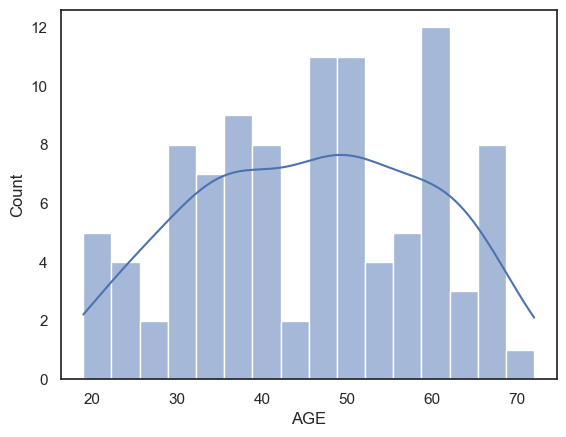

In [57]:
bins=round(1+(3.3*(math.log(len(data)))))

sns.set(palette="deep", style="white")

sns.histplot(data=data, x='AGE', bins=bins,kde=True)

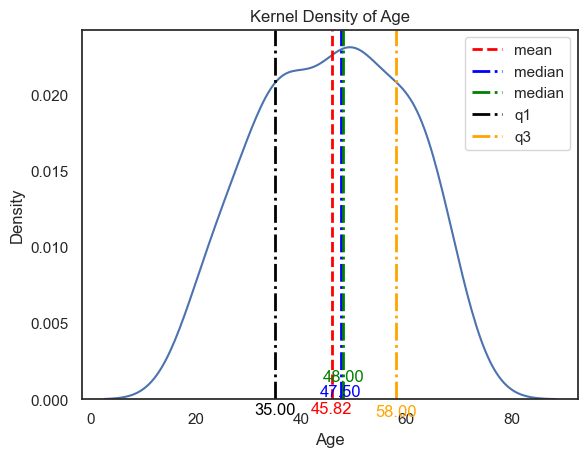

In [62]:
# Plot a kernel density estimate of a continuous variable
sns.kdeplot(data=data, x='AGE')

# Customize the plot (optional)
plt.title('Kernel Density of Age')
plt.xlabel('Age')
plt.ylabel('Density')

#add vertical line of parameter
plt.axvline(x=mean, color='red', linestyle='--', label='mean', linewidth=2)
plt.axvline(x=median, color='blue', linestyle='dashdot', label='median', linewidth=2)
plt.axvline(x=mode, color='green', linestyle='dashdot', label='median', linewidth=2)
plt.axvline(x=q1, color='black', linestyle='dashdot', label='q1', linewidth=2)
plt.axvline(x=q3, color='orange', linestyle='dashdot', label='q3', linewidth=2)

# Add value labels
# Add value labels
plt.text(mean, -0.0001, f'{mean:.2f}', color='red', ha='center', va='top')
plt.text(median, 0.001, f'{median:.2f}', color='blue', ha='center', va='top')
plt.text(mode, 0.002, f'{mode:.2f}', color='green', ha='center', va='top')
plt.text(q1, -0.0002, f'{q1:.2f}', color='black', ha='center', va='top')
plt.text(q3, -0.0003, f'{q3:.2f}', color='orange', ha='center', va='top')

plt.legend()

# Display the plot
plt.show()

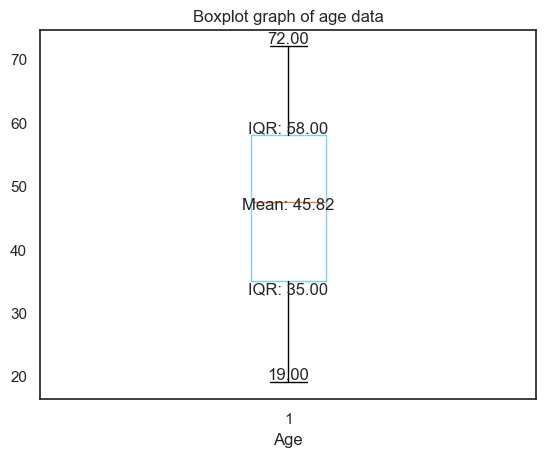

In [79]:
means = np.mean(data, axis=0)
iqrs = np.percentile(data, [25, 75], axis=0)

# Create a boxplot
boxplot = plt.boxplot(data['AGE'],boxprops={'color': 'skyblue'}, showbox=True )

# Add whisker value labels
for whisker in boxplot['whiskers']:
    y = whisker.get_ydata()[1]
    x = whisker.get_xdata().mean()
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Add mean labels
for i, mean in enumerate(means):
    plt.text(i + 1, mean, f'Mean: {mean:.2f}', ha='center', va='bottom')

# Add IQR labels
for i, iqr in enumerate(iqrs.T):
    plt.text(i + 1, iqr[0], f'IQR: {iqr[0]:.2f}', ha='center', va='top')
    plt.text(i + 1, iqr[1], f'IQR: {iqr[1]:.2f}', ha='center', va='bottom')

plt.title('Boxplot graph of age data')
plt.xlabel('Age')

# Display the plot
plt.show()

####
DISKUSI 1

In [67]:
df=pd.read_csv('Salary Data.csv')

In [68]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [69]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [146]:
def unique_values(df):
    uniquedf=df.unique()
    return uniquedf

for i in df.columns:
    if i not in ['Age', 'Years of Experience', 'Salary']:
        #identification=pd.DataFrame({'column':i, 'unique values':unique_values(df[i])})
        print(f'\n{i} \n {unique_values(df[i])}')


Gender 
 ['Male' 'Female' nan]

Education Level 
 ["Bachelor's" "Master's" 'PhD' nan]

Job Title 
 ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst'

In [171]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [172]:
df=df.dropna()

In [173]:
for i in ['Age', 'Years of Experience', 'Salary']:
    #ukuran pemusatan
    mean=np.mean(df[i])
    median=np.median(df[i])
    mode=statistics.mode(df[i])
    q1=stats.scoreatpercentile(df[i], 25)
    q2=stats.scoreatpercentile(df[i], 50)
    q3=stats.scoreatpercentile(df[i], 75)
    skew=df[i].skew()
    kurtosis=df[i].kurtosis()

    #ukuran pesebaran
    range=df[i].max()-df[i].min()
    varians=np.var(df[i])
    std_dev=np.std(df[i])
    koefisien_varians=(std_dev/mean)*100

    # ukuran distribusi
    skew=df[i].skew()
    kurtosis=df[i].kurtosis()

    print(f"\nberikut ukuran pemusatan dari data {i}")
    print(f'mean = {mean}')
    print(f'median = {median}')
    print(f'modus = {mode}')
    print(f'quartile 1 = {q1}')
    print(f'quartile 2 = {q2}')
    print(f'quartile 3 = {q3}')

    print(f"\nberikut ukuran persebaran dari data {i}")
    print(f'range = {range}')
    print(f'varians = {varians}')
    print(f'standar deviasi = {std_dev}')
    print(f'koefisien varians = {koefisien_varians:.2f}%')

    print(f"\nberikut ukuran distribusi dari data {i}")
    print(f'skewness = {skew}')
    print(f'kurtosis ={kurtosis}')


berikut ukuran pemusatan dari data Age
mean = 37.43163538873995
median = 36.0
modus = 33.0
quartile 1 = 31.0
quartile 2 = 36.0
quartile 3 = 44.0

berikut ukuran persebaran dari data Age
range = 30.0
varians = 49.837819577514395
standar deviasi = 7.059590609767283
koefisien varians = 18.86%

berikut ukuran distribusi dari data Age
skewness = 0.19752225917526042
kurtosis =-1.018824770998886

berikut ukuran pemusatan dari data Years of Experience
mean = 10.03083109919571
median = 9.0
modus = 2.0
quartile 1 = 4.0
quartile 2 = 9.0
quartile 3 = 15.0

berikut ukuran persebaran dari data Years of Experience
range = 25.0
varians = 42.87907625297386
standar deviasi = 6.548211683580019
koefisien varians = 65.28%

berikut ukuran distribusi dari data Years of Experience
skewness = 0.36122010462688925
kurtosis =-1.04648005223082

berikut ukuran pemusatan dari data Salary
mean = 100577.34584450402
median = 95000.0
modus = 40000.0
quartile 1 = 55000.0
quartile 2 = 95000.0
quartile 3 = 140000.0

berik

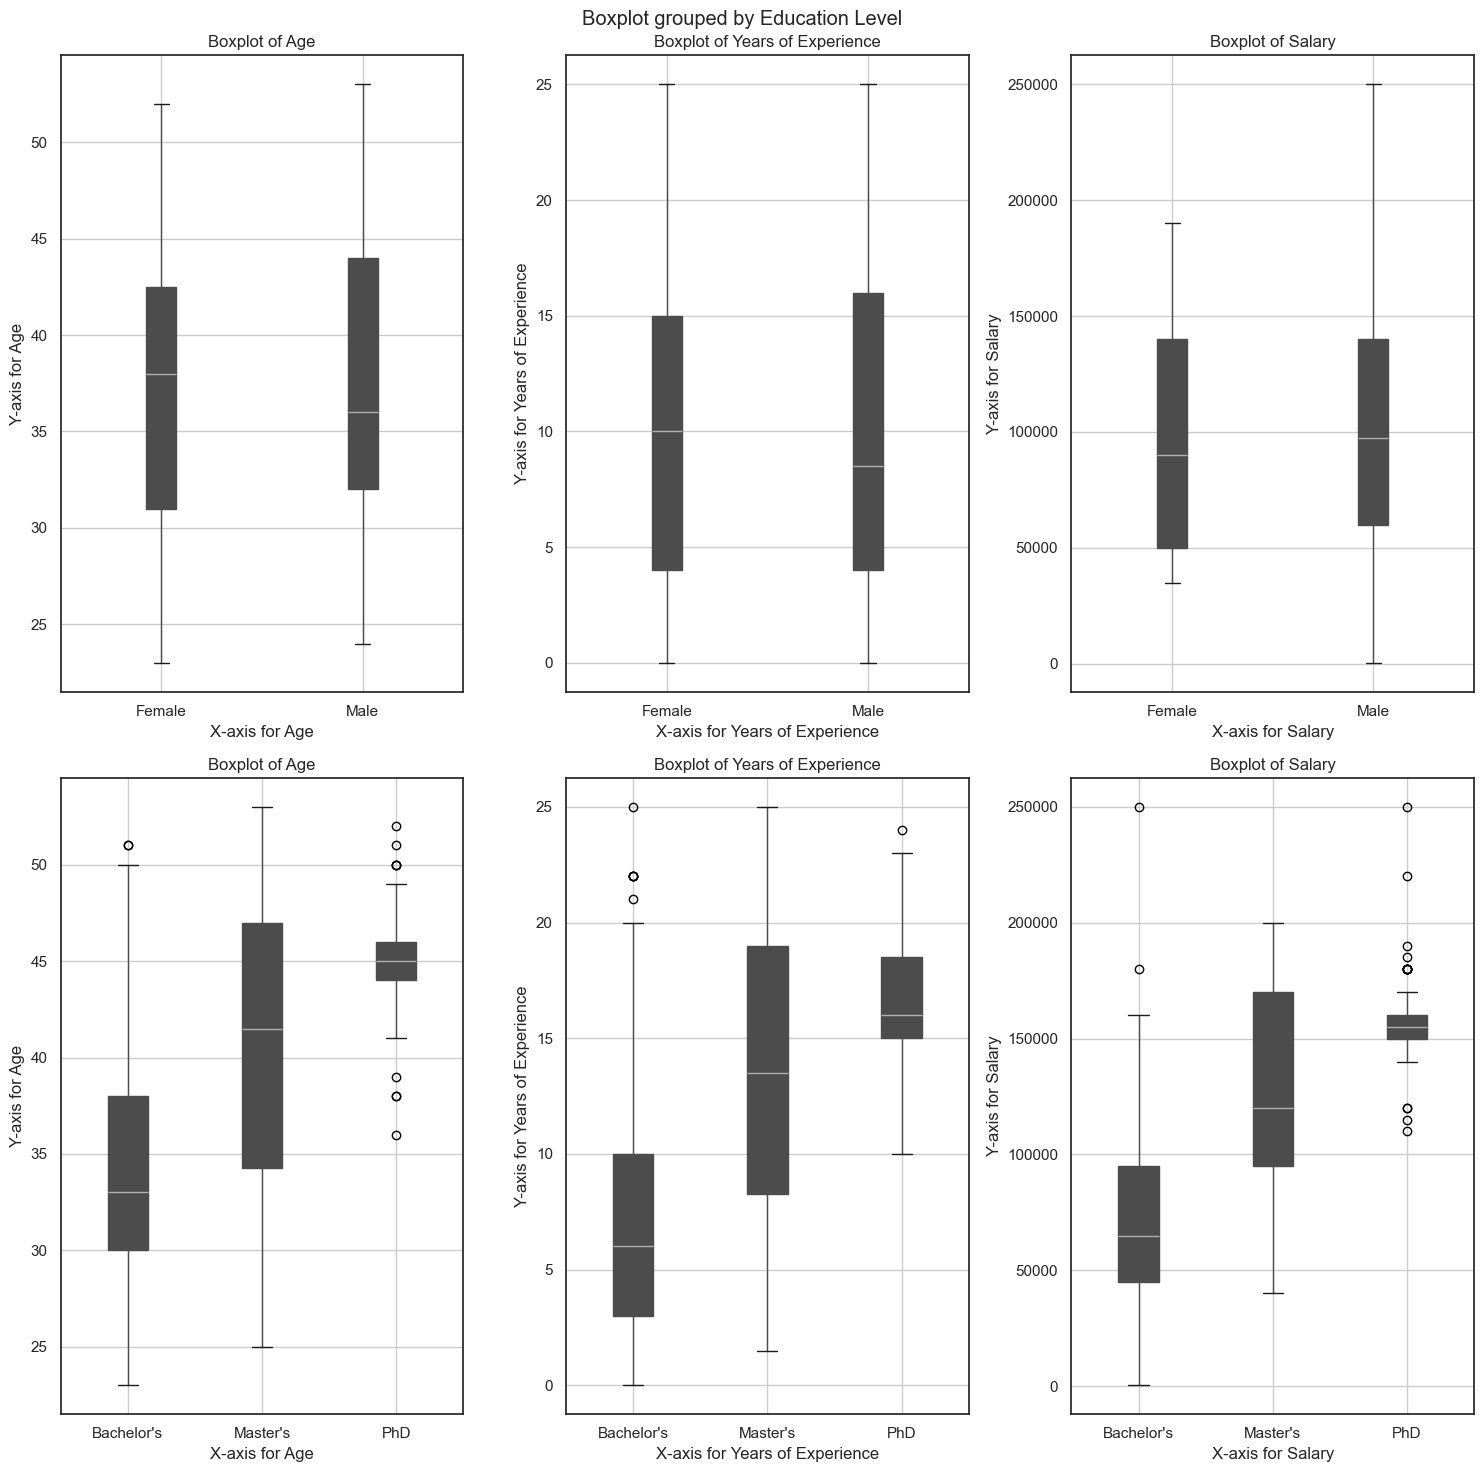

In [174]:
# Specify the columns for the boxplot
columns_to_plot = ['Age', 'Years of Experience', 'Salary']

# Calculate the number of rows and columns for the subplots grid
num_rows = 2
num_cols = 3

# Create the figure and axis objects using subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    bp=df.boxplot(column=col, ax=ax, by='Gender', patch_artist=True)
    ax.set_xlabel('X-axis for {}'.format(col))
    ax.set_ylabel('Y-axis for {}'.format(col))
    ax.set_title('Boxplot of {}'.format(col))

for j, col in enumerate(columns_to_plot):
    ax = axes[j+3]
    bp=df.boxplot(column=col, ax=ax, by='Education Level', patch_artist=True)
    ax.set_xlabel('X-axis for {}'.format(col))
    ax.set_ylabel('Y-axis for {}'.format(col))
    ax.set_title('Boxplot of {}'.format(col))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

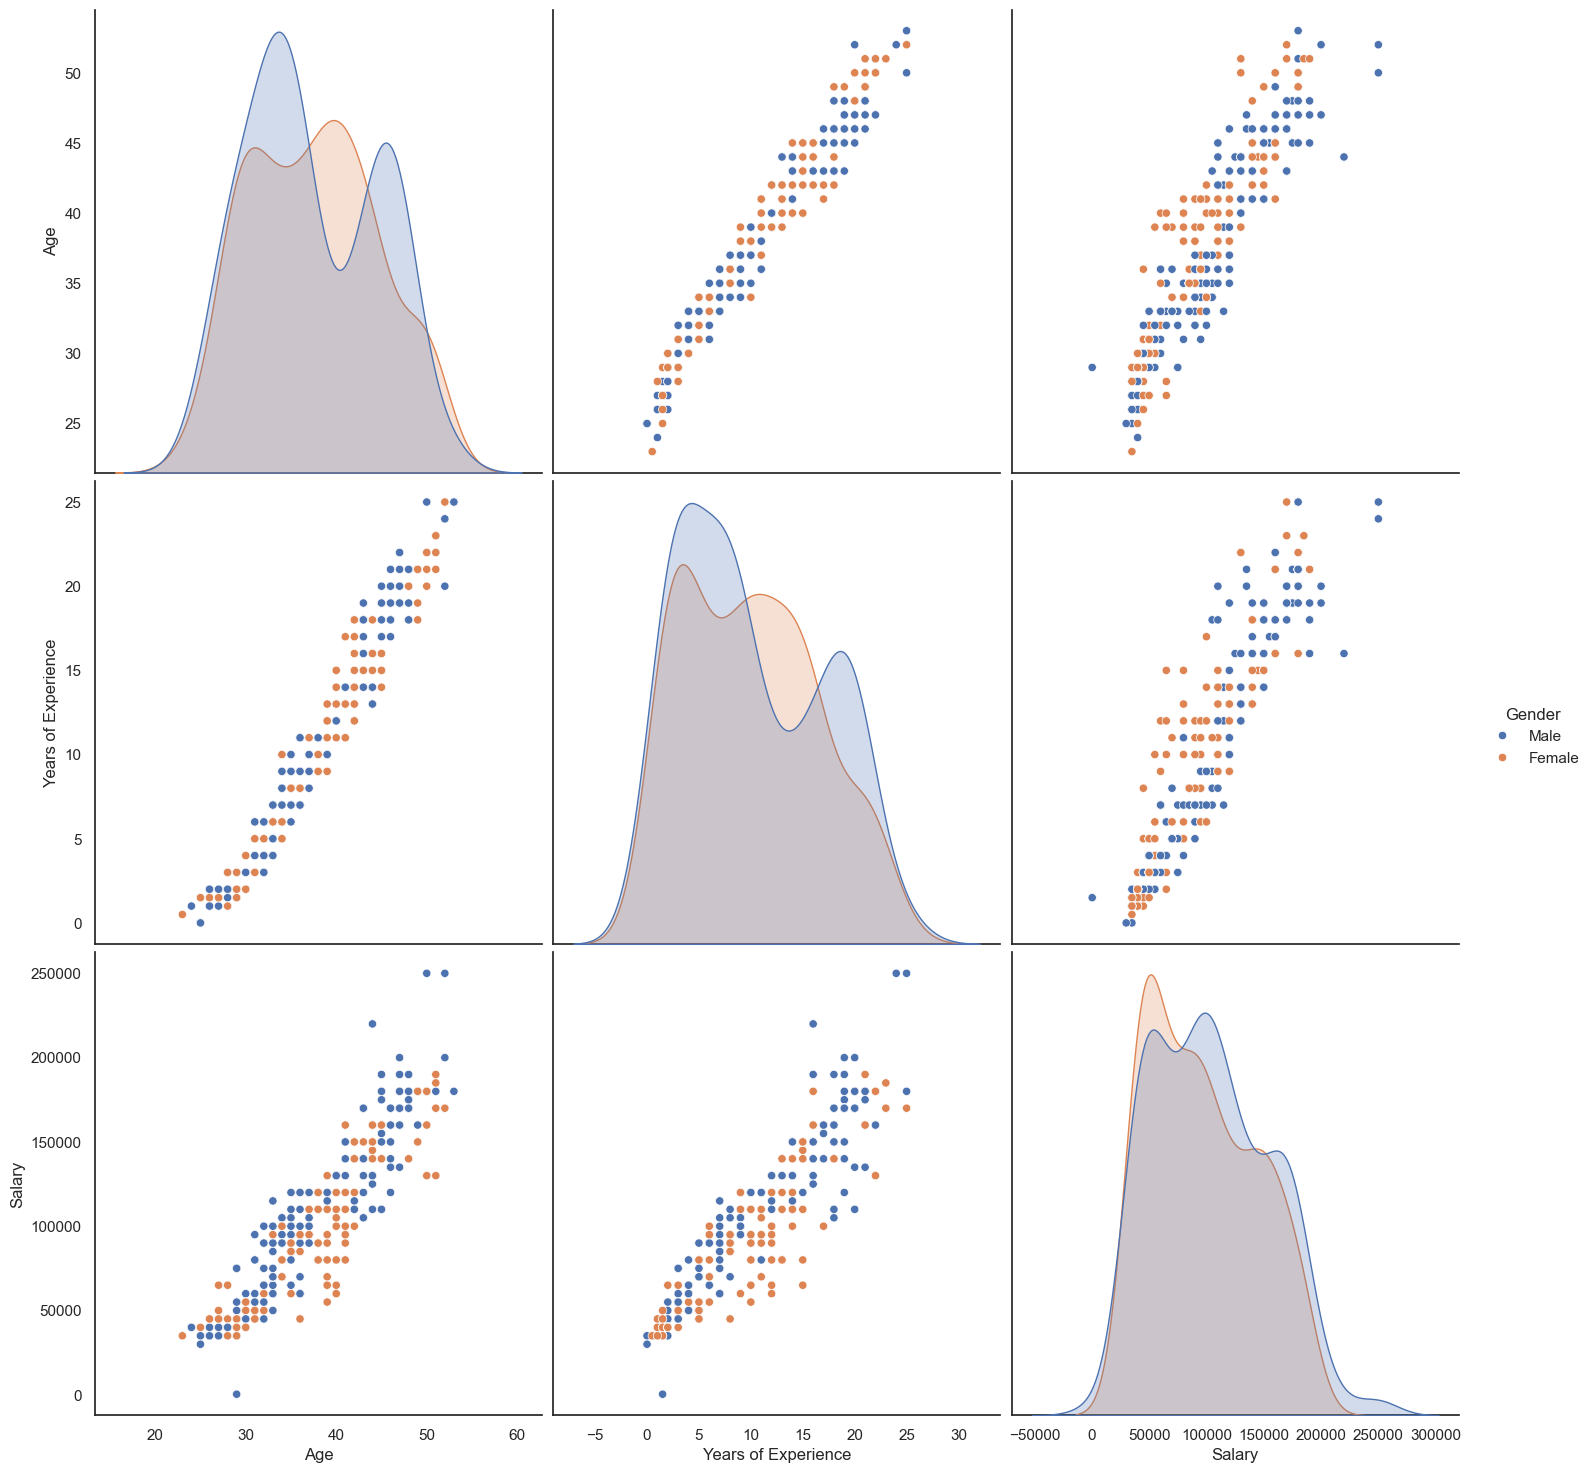

In [175]:
sns.pairplot(data=df[['Age', 'Years of Experience', 'Salary', 'Gender']], hue='Gender', height=5)
plt.show()

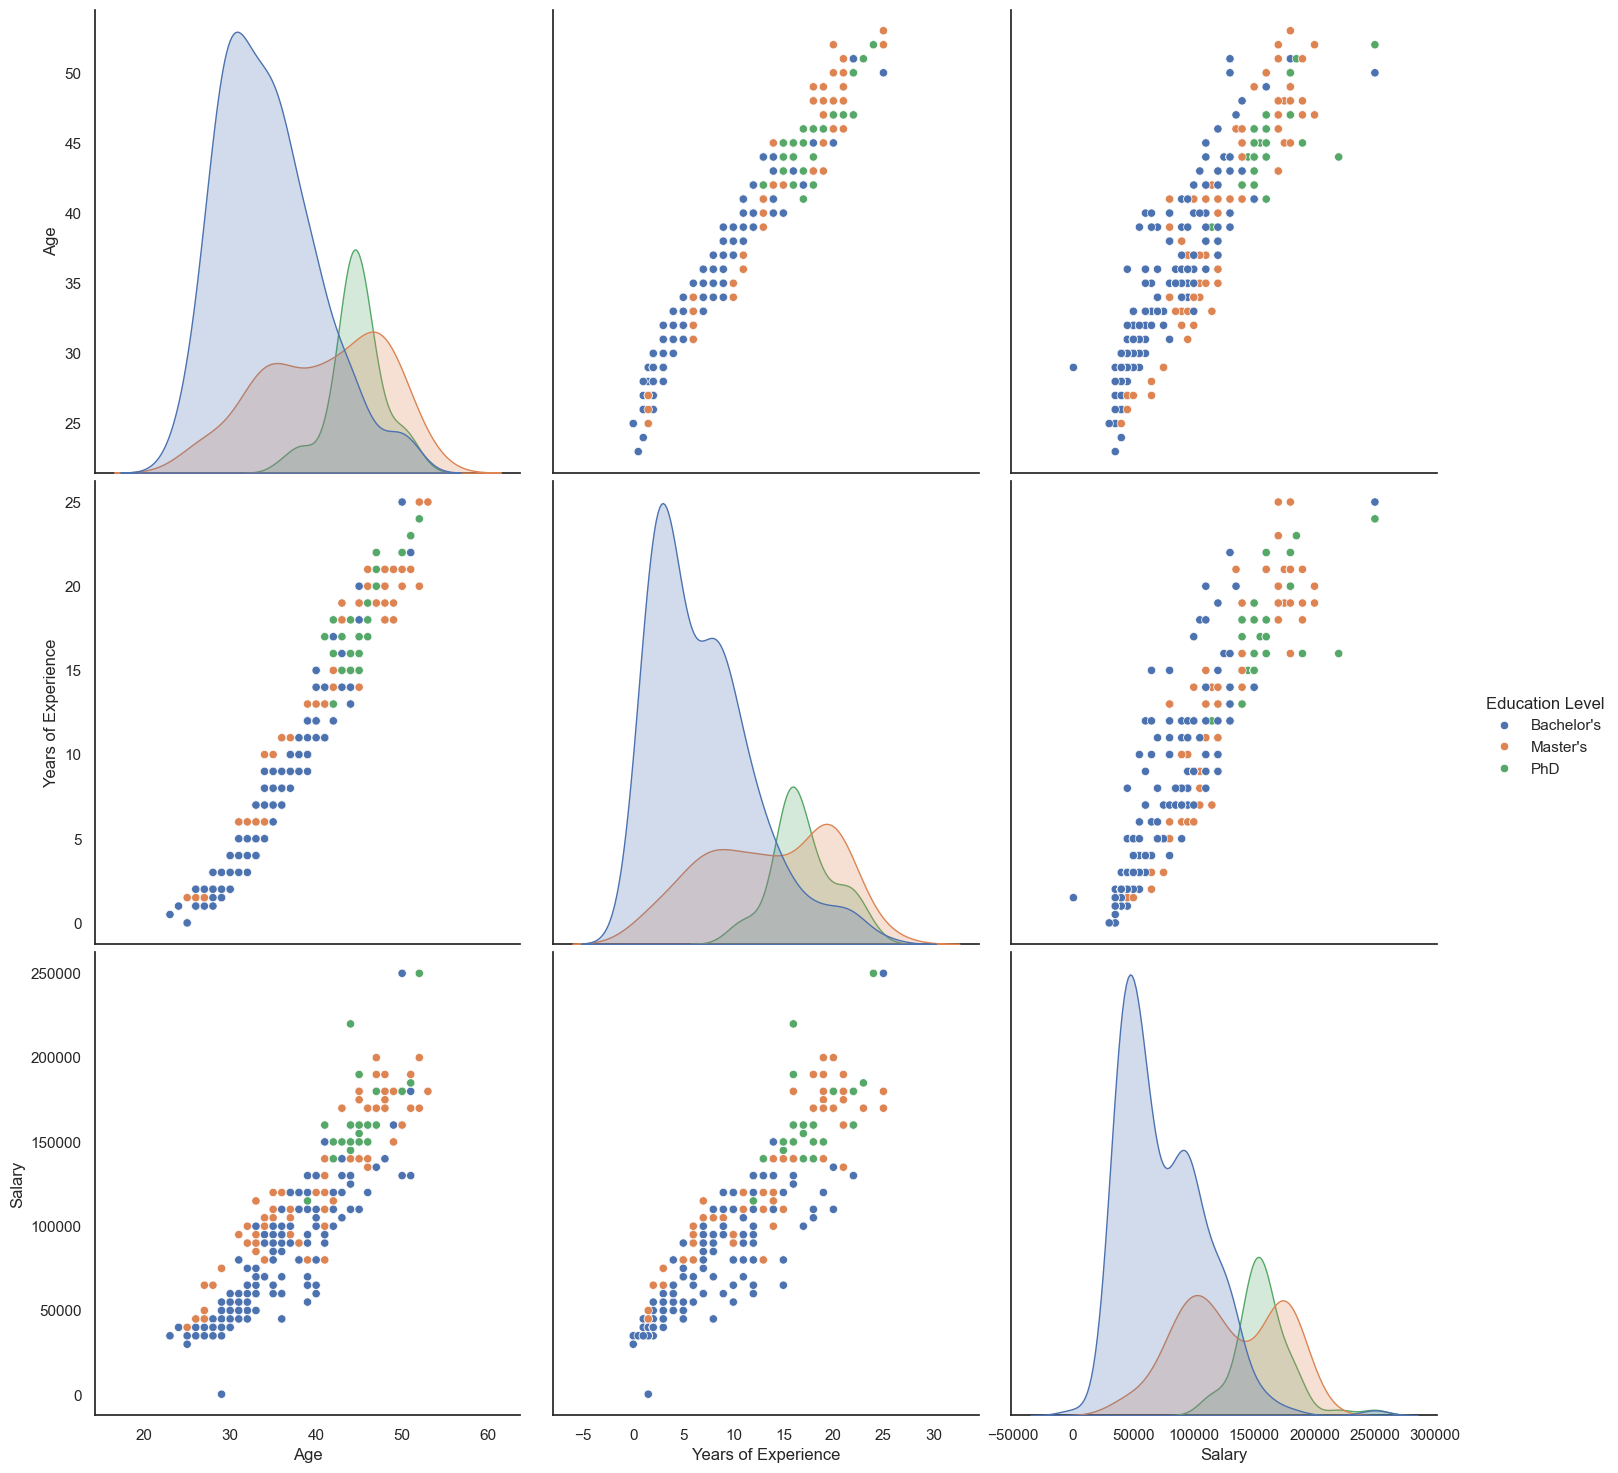

In [176]:
sns.pairplot(data=df[['Age', 'Years of Experience', 'Salary', 'Education Level']], hue='Education Level', height=5)
plt.show()

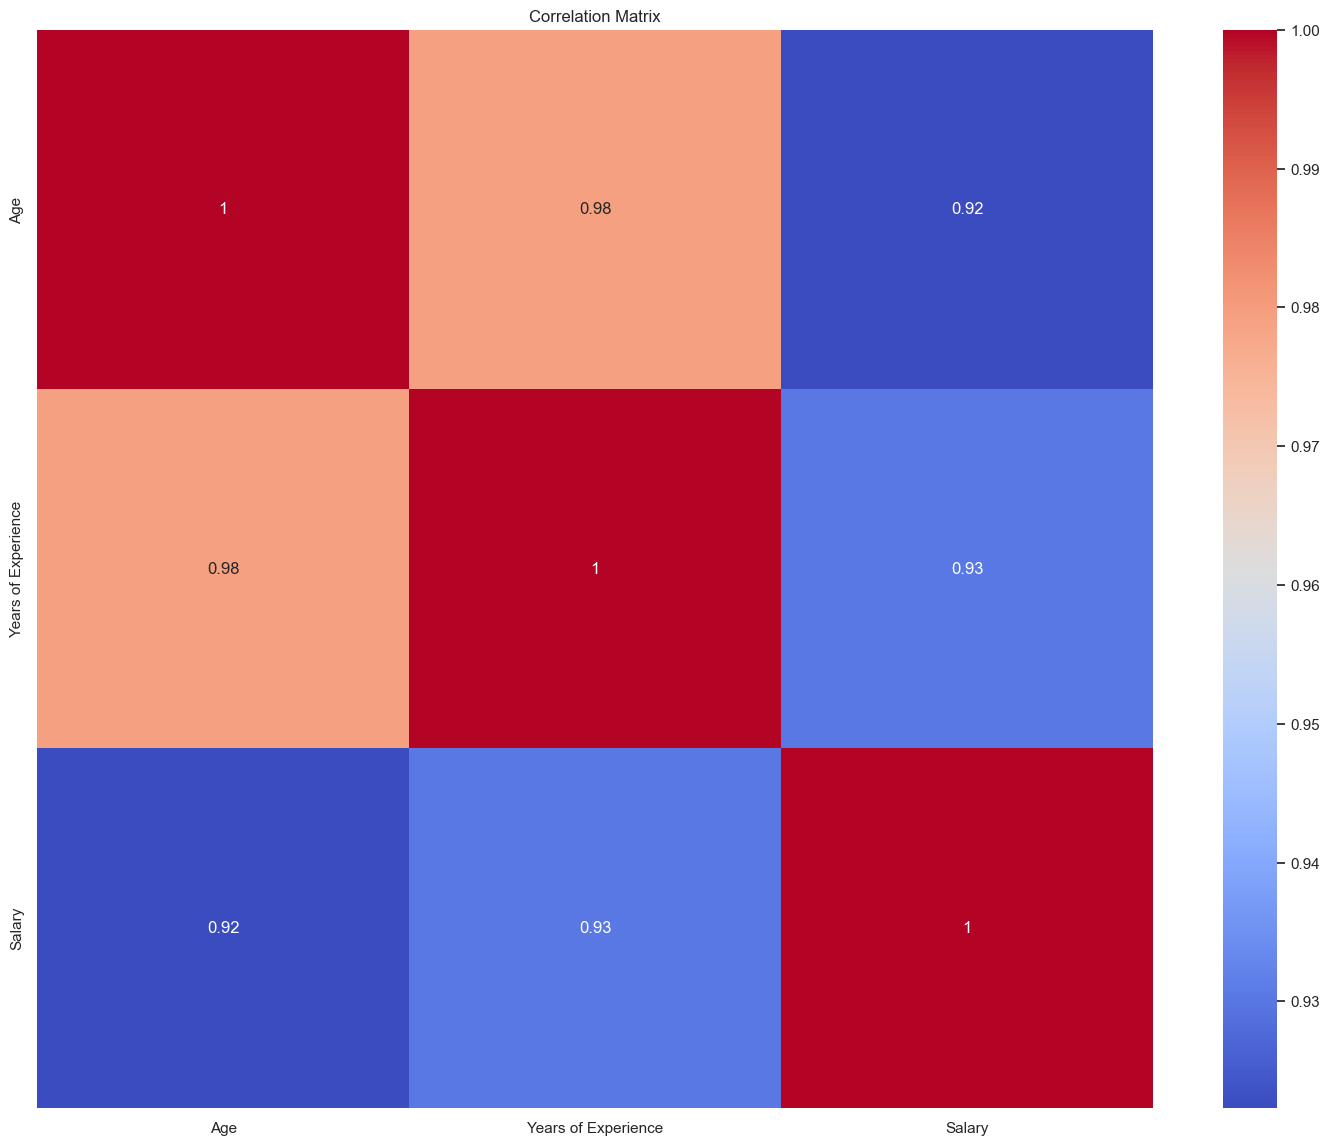

In [177]:
dfcorr = df.drop(['Education Level', 'Job Title', 'Gender'], axis=1)
plt.figure(figsize=(18, 14))
correlation_matrix = dfcorr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

####
Analisis Regresi sederhana

In [179]:
mapping_gender = {
    'Male': 0, 'Female': 1
}

df['Gender'] = df['Gender'].map(mapping_gender)

C:\Users\user\AppData\Local\Temp\ipykernel_31480\2664071985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map(mapping_gender)


In [181]:
'kita tidak menggunakan variabel job title'
df=df.drop(['Job Title'], axis=1)

In [185]:
df_run=pd.get_dummies(df, prefix='', prefix_sep='')

In [186]:
df_run.head()

,Age,Gender,Years of Experience,Salary,Bachelor's,Master's,PhD
0,32.0,0,5.0,90000.0,True,False,False
1,28.0,1,3.0,65000.0,False,True,False
2,45.0,0,15.0,150000.0,False,False,True
3,36.0,1,7.0,60000.0,True,False,False
4,52.0,0,20.0,200000.0,False,True,False


In [187]:
X = df_run.drop(columns='Salary') # Feature untuk memprediksi
y = df_run[['Salary']] # Target yang akan diprediksi

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [189]:
# Tentukan model yang akan digunakan
multi_reg = LinearRegression()

# Train Model
multi_reg.fit(X_train, y_train)

LinearRegression()

In [191]:
y_predict_train = multi_reg.predict(X_train)

In [192]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_train))))

R-squared for training data is 0.8906258664483134
RMSE for training data is 15059.91273049038


In [193]:
y_predict_test = multi_reg.predict(X_test)

In [194]:
print('R-squared for training data is {}'.format(r2_score(y_predict_test, y_test)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_test))))

R-squared for training data is 0.8872757064417757
RMSE for training data is 15226.321749735282


In [196]:
coef_multireg = pd.DataFrame({
    'feature':['intercept'] + X.columns.tolist(),
    'coefficient':[multi_reg.intercept_[0]] + list(multi_reg.coef_[0])
})

coef_multireg

,feature,coefficient
0,intercept,-44963.589665
1,Age,3659.233394
2,Gender,-7707.620279
3,Years of Experience,1868.466426
4,Bachelor's,-15983.826210
5,Master's,4480.536659
6,PhD,11503.289551


####
Menggunakan library statsmodel

In [203]:
# Change object datatype to int
df_run["Bachelor's"] = df_run["Bachelor's"].astype(int)
df_run["Master's"] = df_run["Master's"].astype(int)
df_run["PhD"] = df_run["PhD"].astype(int)

,Age,Gender,Years of Experience,Salary,Bachelor's,Master's,PhD,intercept
0,32.0,0,5.0,90000.0,1,0,0,1
1,28.0,1,3.0,65000.0,0,1,0,1
2,45.0,0,15.0,150000.0,0,0,1,1
3,36.0,1,7.0,60000.0,1,0,0,1
4,52.0,0,20.0,200000.0,0,1,0,1


In [212]:
# Create the X and y arrays for the regression
X_1 = df_run.drop(columns=['Salary', 'PhD', 'intercept'])
y_1 = df_run[['Salary']]

# Fit the regression model
model = sm.OLS(y_1, X_1)
results = model.fit()

# Print the regression results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3979.
Date:                Sun, 05 May 2024   Prob (F-statistic):                   8.77e-318
Time:                        19:00:01   Log-Likelihood:                         -4116.7
No. Observations:                 373   AIC:                                      8243.
Df Residuals:                     368   BIC:                                      8263.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [213]:
X_1 = sm.add_constant(X_1)

# Fit the regression model
model = sm.OLS(y_1, X_1)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     683.1
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.02e-183
Time:                        19:01:24   Log-Likelihood:                -4116.1
No. Observations:                 373   AIC:                             8244.
Df Residuals:                     367   BIC:                             8268.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.552e+04   1